<a href="https://colab.research.google.com/github/Saaj369/convolution_and_applications/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** Sajan Daheriya

**Status:** Finished

# Signal Processing and Fourier Series

This notebook explores the concepts of convolution and its application in signal processing, specifically in the context of Fourier series and image analysis.

## Convolution

Convolution is a mathematical operation that combines two functions to produce a third function that expresses how the shape of one is modified by the other. It's a fundamental operation in many areas of engineering and science, including signal processing, image processing, and statistics.

In this first section, we define a function `Convolution` that computes the convolution of two functions `f` and `g` over a given range of `x` values and for specific `t` values. The `areaUnderTheCurve` function is a helper function used to calculate the area under the product of the two functions at each step of the convolution.

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

def plotTogether(tValues, *args, figsize = (6,6), grid = False, nxticks = 0):
  """
  Plots multiple functions on the same graph.

  Args:
    tValues: A numpy array of x-values for plotting.
    *args: Variable number of numpy arrays representing the y-values of the functions to plot.
    figsize: A tuple specifying the figure size (width, height) in inches. Defaults to (6, 6).
    grid: A boolean indicating whether to display a grid on the plot. Defaults to False.
    nxticks: An integer specifying the desired number of ticks on the x-axis. Defaults to 0 (auto).
  """
  plt.figure(figsize=figsize)
  for arg in args:
    plt.plot(tValues, arg)
  plt.grid(grid)
  if nxticks:
    plt.locator_params(axis='x', nbins = nxticks)
  plt.show()

The functions `f(x)` and `g(x)` are defined and their values are computed over a range of `xValues`.

In [ ]:
# def f(x):
#   if abs(x) > 5:
#     return 0
#   else:
#     if x < 0:
#       return x + 5
#     else:
#       return -x + 5

def f(x):
  """
  Defines a piecewise function f(x).

  Args:
    x: The input value.

  Returns:
    The value of f(x).
  """
  if abs(x) > 5:
    return 0
  else:
    return -x

def g(x):
  """
  Defines a piecewise function g(x).

  Args:
    x: The input value.

  Returns:
    The value of g(x).
  """
  if abs(x) > 2:
    return 0
  else:
    return 4

xValues = np.linspace(-10, 10, 21*2)
fValues = np.array([f(x) for x in xValues])
gValues = np.array([g(-5 - x) for x in xValues])

In [ ]:
def areaUnderTheCurve(fValues, xValues):
  """
  Calculates the approximate area under a curve using the trapezoidal rule.

  Args:
    fValues: A numpy array of y-values of the function.
    xValues: A numpy array of corresponding x-values.

  Returns:
    The approximate area under the curve.
  """
  A = 0
  span = len(xValues)
  for i in range(1, span):
    A += (xValues[i] - xValues[i-1]) * 0.5 * (fValues[i] + fValues[i-1])
  return A

np.float64(9.103828801926284e-15)

In [ ]:
def Convolution(f, g, xValues, tValues):
  """
  Computes the convolution of two functions f and g.

  Args:
    f: The first function.
    g: The second function.
    xValues: A numpy array of x-values over which to compute the product of the functions.
    tValues: A numpy array of shift values for the second function.

  Returns:
    A numpy array representing the convolution of f and g for each t in tValues.
  """
  C = []
  for t in tValues:
    fValues = np.array([f(x) for x in xValues])
    gValues = np.array([g(t - x) for x in xValues])
    fgValues = fValues * gValues
    A = areaUnderTheCurve(fgValues, xValues)
    C.append(A)
  return np.array(C)

The convolution of `f` and `g` is computed using the `Convolution` function, and the result `C` is plotted against `tValues`.

In [ ]:
tValues = np.linspace(-10, 10, 21*2)
C = Convolution(f, g, xValues, tValues)

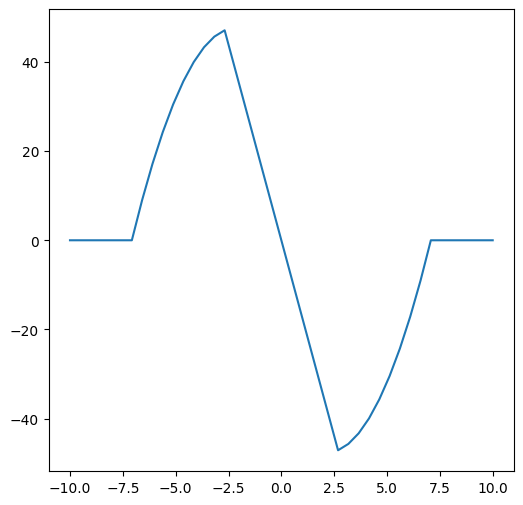

In [ ]:
plotTogether(tValues, C)

The original functions `f(x)` and `g(x)` are plotted together for comparison.

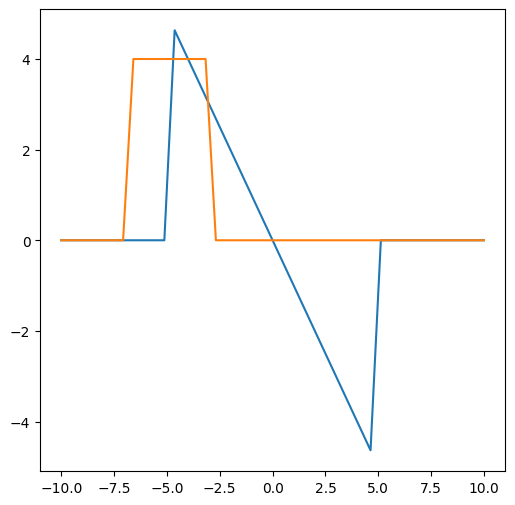

In [ ]:
plotTogether(xValues, fValues, gValues)

The product of the two functions `f(x) * g(x)` is plotted. The area under this curve at each `t` value is what is calculated by the `areaUnderTheCurve` function within the convolution process.

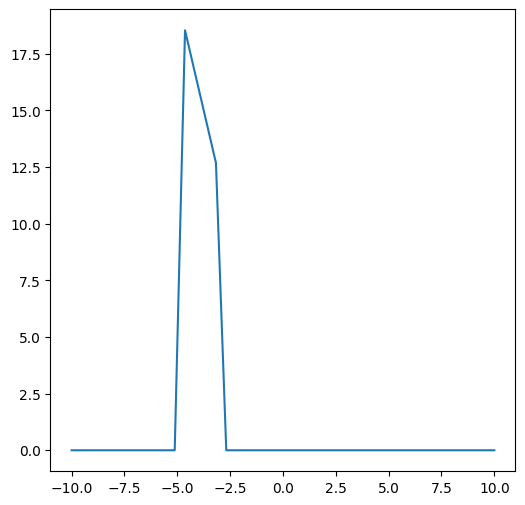

In [ ]:
plotTogether(tValues, fValues*gValues)

## Convolution and Fourier Series

In this section, we explore the relationship between convolution and Fourier series. The Fourier series allows us to represent a periodic function as a sum of sines and cosines of different frequencies and amplitudes. Convolution can be used as a tool to identify the dominant frequencies present in a signal.

Here, we define a signal as a sum of sine waves with different frequencies and amplitudes.

We then define a set of sine waves with a range of frequencies. By convolving the original signal with each of these sine waves, we can see how strongly each frequency component is present in the original signal. The maximum value of the convolution output for each sine wave indicates the magnitude of that frequency component in the original signal.

In [ ]:
signal = lambda x : 3 * np.sin(3*x) + 2 * np.sin(7*x) + 4 * np.sin(15*x)
xValues = np.linspace(0, 2*np.pi, 200)
sigValues = np.array([signal(x) for x in xValues])

freqValues = np.linspace(0,20,100)
sines = [lambda x, k=k : np.sin(k*x) for k in freqValues]

tValues = np.linspace(0, 2*np.pi, 100)

In [ ]:
magnitudes = []
for sine in sines:
  C = Convolution(signal, sine, xValues, tValues)
  magnitudes.append(np.max(C))
magnitudes = np.array(magnitudes)

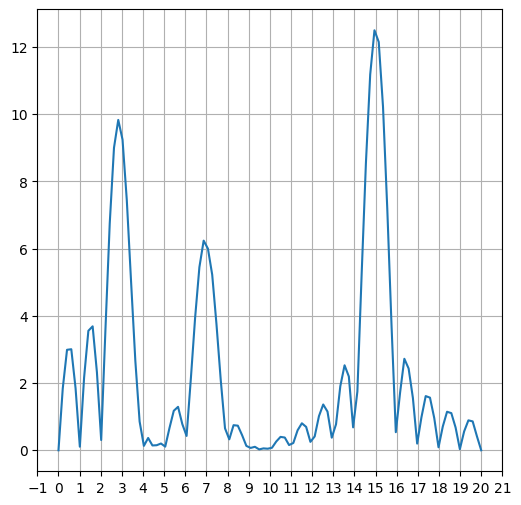

In [ ]:
plotTogether(freqValues, magnitudes, figsize = (6,6), grid=True, nxticks = 40)

The plot above shows the magnitudes of the convolution results for each frequency. The peaks in this plot correspond to the dominant frequencies present in the original signal. We can see clear peaks at frequencies 3, 7, and 15, which correspond to the frequencies of the sine waves that make up the original signal.

We can then extract the frequencies with magnitudes above a certain threshold to identify the significant frequency components.

In [ ]:
freqsDetected = freqValues[magnitudes > 5.0]
coefficients = magnitudes[magnitudes > 5.0]
freqsDetected

array([ 2.42424242,  2.62626263,  2.82828283,  3.03030303,  3.23232323,
        3.43434343,  6.66666667,  6.86868687,  7.07070707,  7.27272727,
       14.34343434, 14.54545455, 14.74747475, 14.94949495, 15.15151515,
       15.35353535, 15.55555556])

Using these detected frequencies and their corresponding magnitudes (as estimated by the convolution), we can attempt to reconstruct the original signal.

In [ ]:
def estimatedFunction(x):
  """
  Estimates a function based on detected frequencies and coefficients.

  Args:
    x: The input value.

  Returns:
    The estimated function value at x.
  """
  f = 0
  for freq, coeff in zip(freqsDetected, coefficients):
    f += coeff * np.sin(freq*x)
  return f

In [ ]:
estimate = np.array([estimatedFunction(x) for x in xValues])

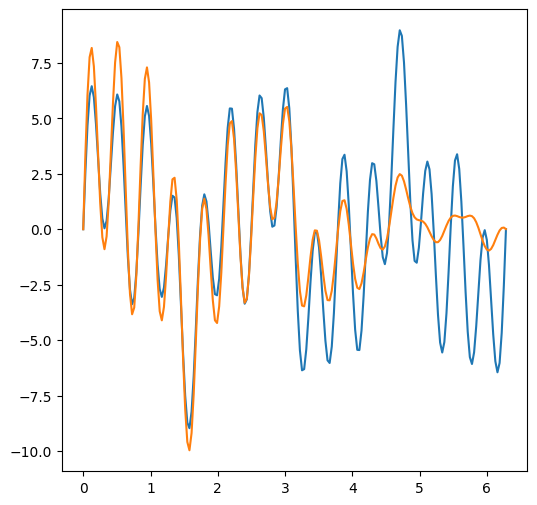

In [ ]:
plotTogether(xValues, sigValues, estimate/12)

The plot above compares the original signal with the estimated signal. While not a perfect match (due to the discrete nature of the analysis and approximation), it demonstrates how convolution can be used to identify and extract frequency components from a signal, which is a fundamental concept in Fourier analysis.

In [ ]:
signal = lambda x : 3 * np.sin(3*x) + 2 * np.sin(7*x) + 4 * np.sin(15*x)

xValues = np.linspace(0, 16*np.pi, 2000)
sigValues = np.array([signal(x) for x in xValues])

freqValues = np.linspace(0,20,1000)
sines = [lambda x, k=k : np.sin(k*x) for k in freqValues]
cosines = [lambda x, k=k : np.cos(k*x) for k in freqValues]

tValues = np.array([0])

In [ ]:
magSines = np.zeros(len(sines))
magCosines = np.zeros(len(sines))
for i in range(len(sines)):
  Cs = Convolution(signal, sines[i], xValues, tValues)
  Cc = Convolution(signal, cosines[i], xValues, tValues)
  magSines[i] = Cs[0]
  magCosines[i] = Cc[0]

magnitudes = np.sqrt(magSines**2 + magCosines**2)

In [ ]:
magnitudes.max()/(0.5*(xValues[-1] - xValues[0]))

np.float64(3.988870203796712)

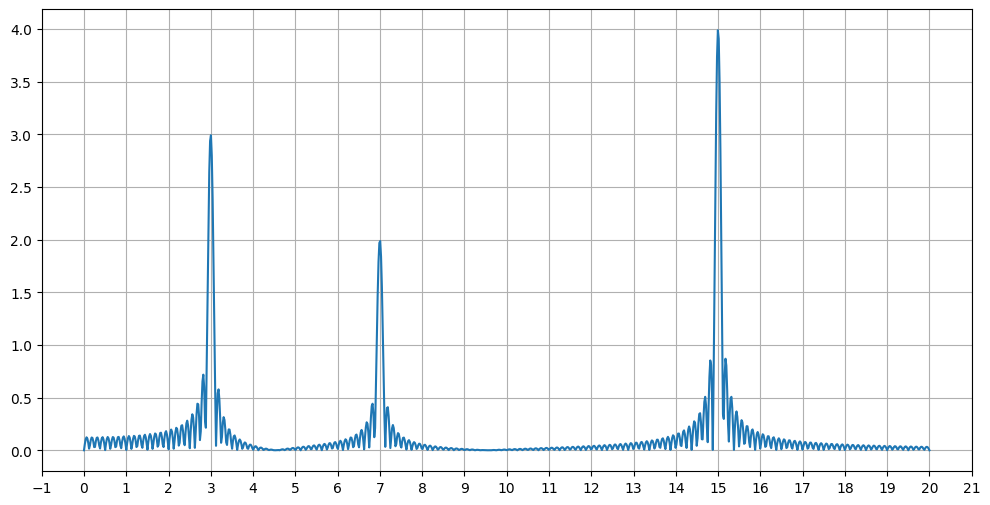

In [ ]:
plotTogether(freqValues, magnitudes/(0.5*(xValues[-1] - xValues[0])), figsize = (12,6), grid=True, nxticks = 40)

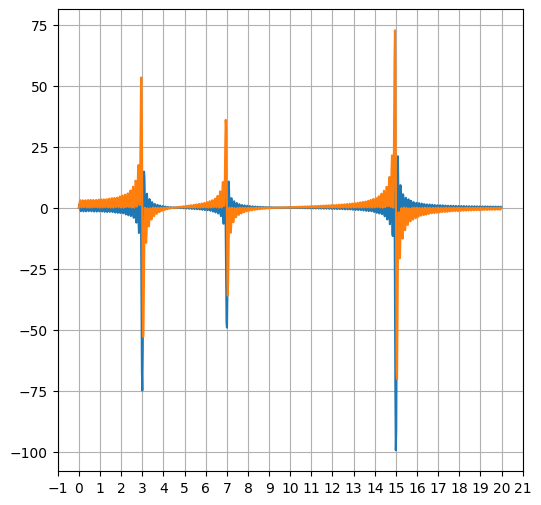

In [ ]:
plotTogether(freqValues, magSines, magCosines, figsize = (6,6), grid=True, nxticks = 40)

In [ ]:
normMagnitudes = magnitudes/(0.5*(xValues[-1] - xValues[0]))
freqsDetected = freqValues[normMagnitudes > 1.0]
coefficients = magnitudes[normMagnitudes > 1.0]
freqsDetected

array([ 2.92292292,  2.94294294,  2.96296296,  2.98298298,  3.003003  ,
        3.02302302,  3.04304304,  3.06306306,  3.08308308,  6.92692693,
        6.94694695,  6.96696697,  6.98698699,  7.00700701,  7.02702703,
        7.04704705,  7.06706707, 14.91491491, 14.93493493, 14.95495495,
       14.97497497, 14.99499499, 15.01501502, 15.03503504, 15.05505506,
       15.07507508, 15.0950951 ])

In [ ]:
def estimatedFunction(x):
  """
  Estimates a function based on detected frequencies and coefficients.

  Args:
    x: The input value.

  Returns:
    The estimated function value at x.
  """
  f = 0
  for freq, coeff in zip(freqsDetected, coefficients):
    f += coeff * np.sin(freq*x)
  return f

In [ ]:
estimate = np.array([estimatedFunction(x) for x in xValues])

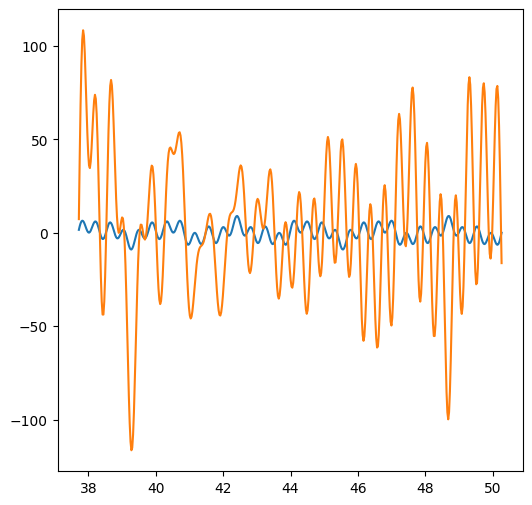

In [ ]:
n1, n2 = 1500, 2000
plotTogether(xValues[n1:n2], sigValues[n1:n2], estimate[n1:n2])

## Image Analysis (Convolution)

## Image Analysis (Convolution)

Convolution is also a fundamental operation in image processing. It is used for various tasks such as blurring, sharpening, edge detection, and more. In this section, we will explore how different kernels can be convolved with an image to achieve these effects.

First, we define some helper functions to display and compare images.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show(arr, size):
  """
  Displays an image represented as a numpy array.

  Args:
    arr: A numpy array representing the image.
    size: A tuple specifying the display size (width, height) in inches.
  """
  plt.figure(figsize=size)  # Bigger display size, not image resolution
  plt.imshow(arr)
  plt.axis('off')
  plt.show()

def compare(titles, arrs, figsize, rows, columns):
  """
  Compares multiple images by displaying them in a grid.

  Args:
    titles: A list of strings representing the titles for each image.
    arrs: A list of numpy arrays representing the images.
    figsize: A tuple specifying the figure size (width, height) in inches.
    rows: The number of rows in the image grid.
    columns: The number of columns in the image grid.
  """
  fig, axes = plt.subplots(rows, columns, figsize=figsize)

  for ax, img, title in zip(axes, arrs, titles):
      ax.imshow(img)
      ax.set_title(title)
      ax.axis('off')

  plt.tight_layout()
  plt.show()

We then define a function `GenKernel` to generate different types of convolutional kernels:

- **Uniform Blur (UB):** A kernel with equal weights, used for simple blurring.
- **Gaussian Blur (GB):** A kernel with weights based on a Gaussian distribution, providing a smoother blur.
- **Detect Horizontal Outline (DHO):** A kernel designed to highlight horizontal edges.
- **Detect Vertical Outline (DVO):** A kernel designed to highlight vertical edges.

In [ ]:
def GenKernel(n, kerType, **kwargs):
  """
  Generates different types of kernels for image processing.

  Args:
    n: An integer defining the size of the kernel (kernel size is 2*n + 1).
    kerType: A string specifying the type of kernel to generate ("UB", "GB", "DHO", "DVO").
    **kwargs: Additional keyword arguments for specific kernel types (e.g., sigma for "GB").

  Returns:
    A numpy array representing the generated kernel, or None if kerType is invalid.
  """
  kerSize = 2*n + 1
  if kerType == "UB":
    kernel = np.ones((kerSize, kerSize)) / (kerSize*kerSize)
    kernel = np.flip(kernel, axis=(0,1))
    return kernel
  elif kerType == "GB":
    sigma = kwargs.get("sigma", 1.0)
    ax = np.linspace(-n, n, kerSize)
    xx, yy = np.meshgrid(ax, ax)

    Gkernel = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
    Gkernel = Gkernel / np.sum(Gkernel)
    Gkernel = np.flip(Gkernel, axis=(0,1))
    return Gkernel
  elif kerType == "DHO": # Detect Horizontal Change
    DHOkernel = np.ones((kerSize, kerSize))
    DHOkernel[:,n] = 0
    DHOkernel = DHOkernel/np.sum(DHOkernel)
    for i in range(n):
      DHOkernel[:, i] *= -1
    DHOkernel = np.flip(DHOkernel, axis=(0,1))
    return DHOkernel
  elif kerType == "DVO":
    DVOkernel = np.ones((kerSize, kerSize))
    DVOkernel[n,:] = 0
    DVOkernel = DVOkernel/np.sum(DVOkernel)
    for i in range(n):
      DVOkernel[i, :] *= -1
    DVOkernel = np.flip(DVOkernel, axis=(0,1))
    return DVOkernel
  else:
    return None

Here, we generate instances of these kernels with a specified size.

In [ ]:
n = 2
UBkernel =GenKernel(n, "UB")
GBkernel = GenKernel(n, "GB", sigma = 1.0)
DHOkernel = GenKernel(n, "DHO")
DVOkernel = GenKernel(n, "DVO")

The `applyKernel` function performs the convolution of a given kernel with an image. It iterates through each pixel of the image and applies the kernel to a neighborhood around that pixel, calculating a new value for the center pixel.

In [ ]:
def applyKernel(kernel, arr):
  """
  Applies a kernel to an image represented as a numpy array using convolution.

  Args:
    kernel: A numpy array representing the kernel to apply.
    arr: A numpy array representing the input image.

  Returns:
    A numpy array representing the output image after applying the kernel.
  """
  height, width, _ = arr.shape
  arrMod = arr.copy()
  n = kernel.shape[0] // 2
  for i in range(n, height-n):
    for j in range(n, width-n):
      modPixel = np.zeros(3)
      for ki in range(i-n, i+n+1):
        for kj in range(j-n, j+n+1):
          modPixel += arr[ki, kj] * kernel[ki - (i-n), kj - (j-n)]

      arrMod[i,j] = modPixel

  return arrMod

We load an example image to demonstrate the effects of the kernels.

We apply the generated kernels to the image using the `applyKernel` function.

In [ ]:
img = Image.open("/content/sunflower.jpg").convert("RGB")
arr = np.array(img)
show(arr, (6,6))

In [ ]:
UBarr = applyKernel(UBkernel, arr)
GBarr = applyKernel(GBkernel, arr)
DHOarr = applyKernel(DHOkernel, arr)
DVOarr = applyKernel(DVOkernel, arr)

Here we compare the original image with the images after applying the Gaussian Blur and Uniform Blur kernels. You can observe how both kernels blur the image, with Gaussian blur often producing a more natural-looking result.

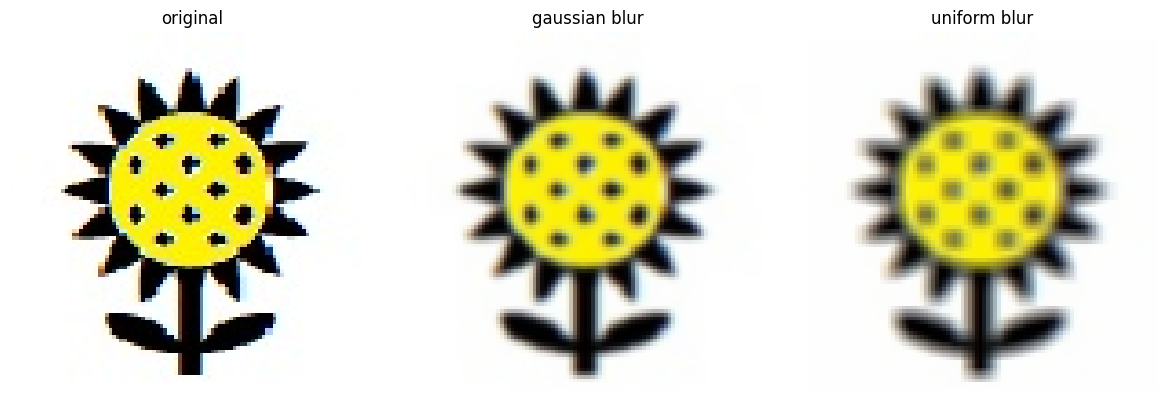

In [ ]:
compare(["original", "gaussian blur", "uniform blur"], [arr, GBarr, UBarr], (12,4), 1, 3)

This comparison shows the effects of the horizontal and vertical outline detection kernels. Notice how these kernels highlight the edges in the corresponding directions.

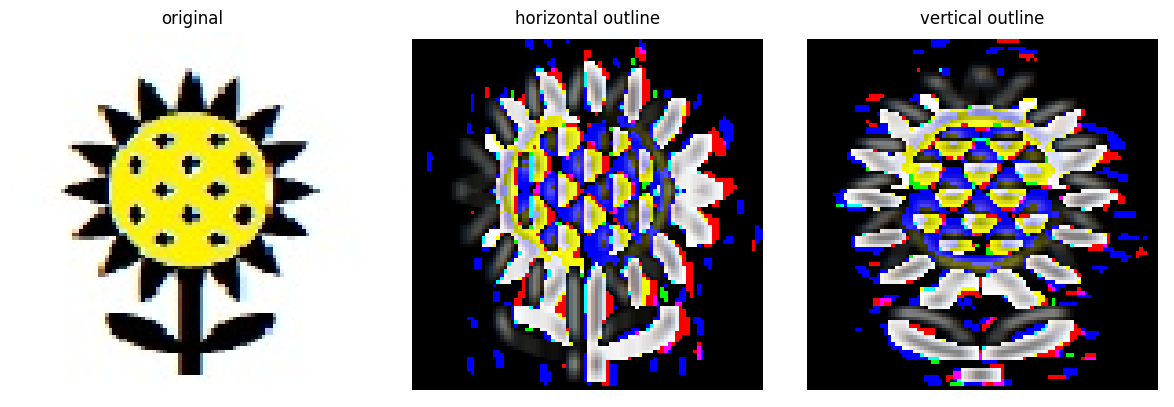

In [ ]:
compare(["original", "horizontal outline", "vertical outline"], [arr, DHOarr, DVOarr], (12,4), 1, 3)

This example demonstrates the effect of varying the `sigma` parameter in the Gaussian Blur kernel. A larger `sigma` value results in a more significant blur.

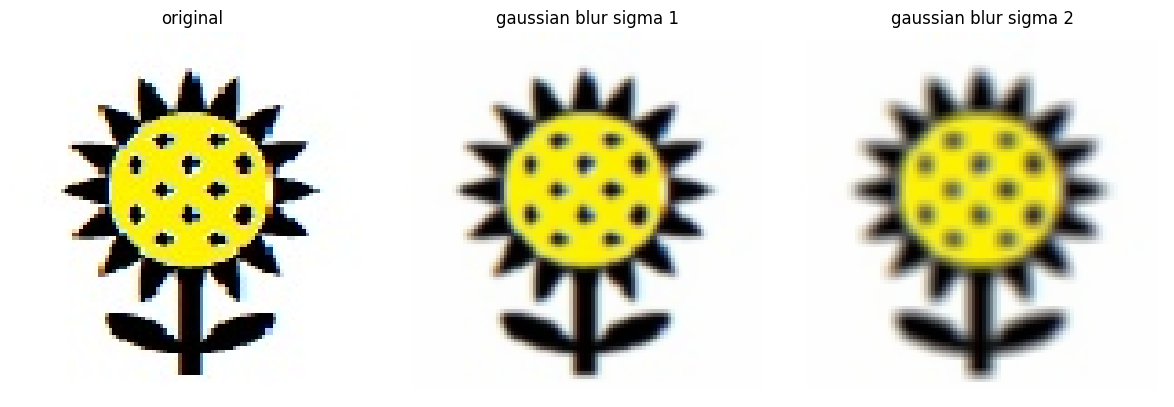

In [ ]:
n = 2
compare(["original", "gaussian blur sigma 1", "gaussian blur sigma 2"], [arr, applyKernel(GenKernel(n, "GB", sigma = 0.8), arr), applyKernel(GenKernel(n, "GB", sigma = 2), arr)], (12,4), 1, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
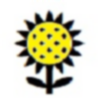

In [ ]:
GBarr

Convolution can also be used for sharpening images. Here, a sharpening kernel is applied to the blurred image to enhance the edges and details.

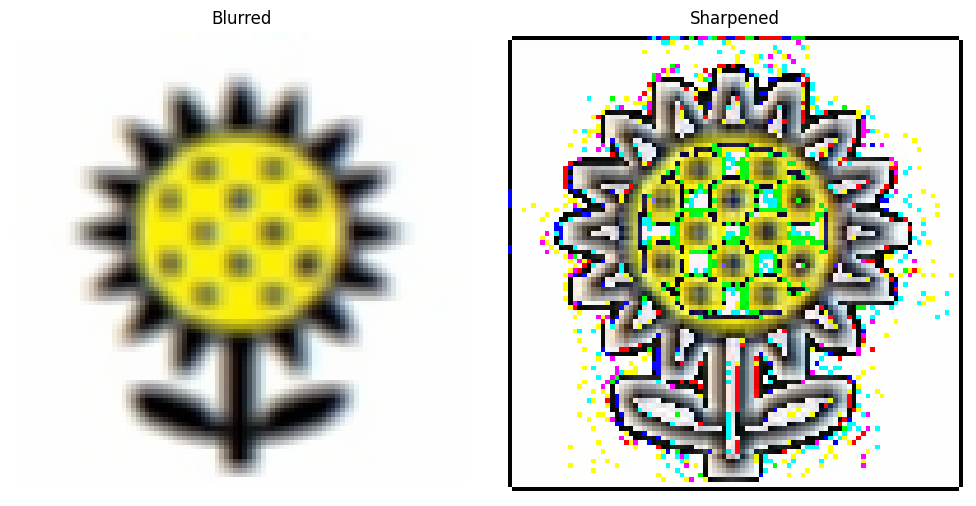

In [ ]:
Sharpkernel = np.array([
    [0, -1.0, 0],
    [-1.0, 5.0, -1.0],
    [0, -1.0, 0]
])
Sharpkernel /= np.sum(Sharpkernel)
Sharparr = applyKernel(Sharpkernel, UBarr)
compare(["Blurred", "Sharpened"], [UBarr, Sharparr], (10,5), 1, 2)

This example uses a different sharpening kernel with stronger weights, resulting in a more intense sharpening effect.

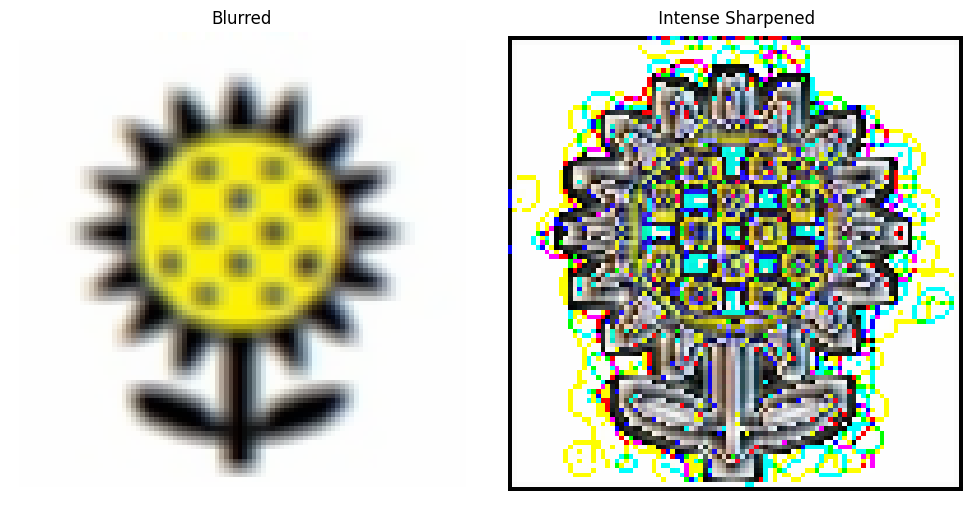

In [ ]:
Sharpkernel = np.array([
    [-1.0, -1.0, -1.0],
    [-1.0, 9.0, -1.0],
    [-1.0, -1.0, -1.0]
])
Sharpkernel /= np.sum(Sharpkernel)
Sharparr = applyKernel(Sharpkernel, UBarr)
compare(["Blurred", " Intense Sharpened"], [UBarr, Sharparr], (10,5), 1, 2)

**Note:** The docstrings in this notebook were generated with the assistance of an AI and have been reviewed and checked for correctness by the author.